In [1]:
from models.DAX import DAX_quantile_regression, DAX_baseline
from models.energy import energy_quantile_regression
from functions import get_energy,get_DAX,merge_submissions,check_submission
from functions.prepare_data import split_time
from functions.evaluation import evaluate_horizon
from tqdm import tqdm
from functions import evaluate_model
from models.energy import energy_baseline

In [2]:
# Load data
energy = get_energy.get()

  0%|          | 0/259 [00:00<?, ?it/s]/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/functions/get_energy.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  energydata = pd.concat([energydata, pd.DataFrame(rawdata, columns=col_names)])
100%|██████████| 259/259 [00:26<00:00,  9.75it/s]


In [3]:
baseline_model = {
    'name': 'Baseline Model',
    'function': energy_baseline.energy_baseline
}
quantile_model = {
    'name': 'Quantile Regression',
    'function': energy_quantile_regression.energy_quantile_regression
}


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5066
Model:                       QuantReg   Bandwidth:                      0.6983
Method:                 Least Squares   Sparsity:                        12.01
Date:                Sun, 10 Dec 2023   No. Observations:                43504
Time:                        22:18:11   Df Residuals:                    43468
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8088      0.175    335.954      0.000      58.466      59.152
weekday       -1.8496      0.014   -128.468      0.000      -1.878      -1.821
month_2        0.4342      0.143      3.044      0.002       0.155       0.714
month_3       -3.2379      0.139    -23.255      0.0

/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldc

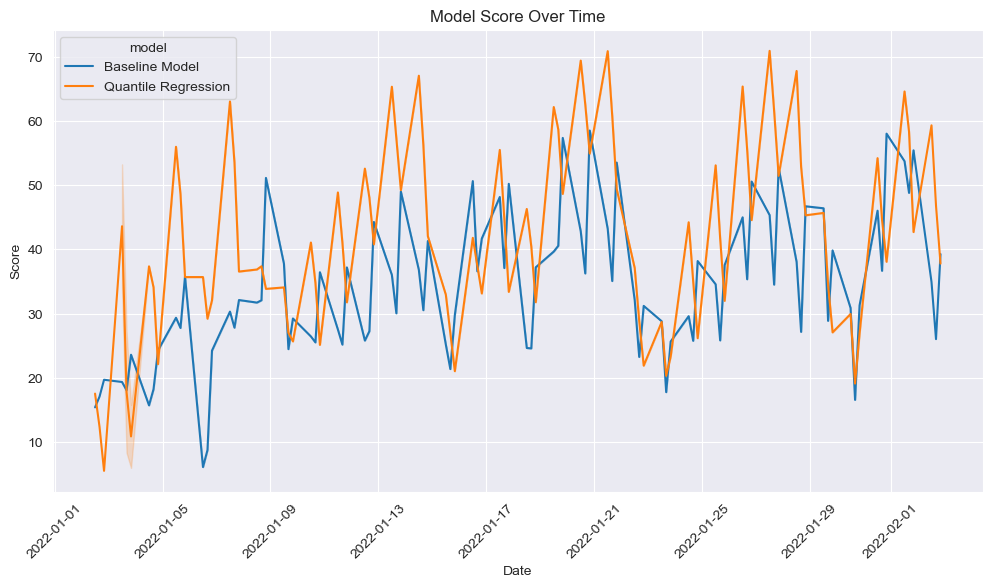

In [4]:
start_date = '2022-01-01'
end_date = '2022-01-31'

evaluation_model1, evaluation_model2, grouped_scores = evaluate_model.evaluate(baseline_model, quantile_model, energy, start_date, end_date, horizon_format="hours")